In [11]:
import requests
import pandas as pd
import seaborn as sb

In [3]:
url = 'https://api.nal.usda.gov/fdc/v1/foods/list?query=&pageNumber=51&pageSize=194&api_key=u983gbYksVQ78GYn6mlvsMTLw0jcU0btxntKZSX0'

In [4]:
response=requests.get(url)
response=response.json()
response

[{'fdcId': 2344119,
  'description': 'Pizza with pepperoni, from frozen, thin crust',
  'dataType': 'Survey (FNDDS)',
  'publicationDate': '2022-10-28',
  'foodCode': '58106512',
  'foodNutrients': [{'number': '203',
    'name': 'Protein',
    'amount': 12.2,
    'unitName': 'G'},
   {'number': '204',
    'name': 'Total lipid (fat)',
    'amount': 12.7,
    'unitName': 'G'},
   {'number': '205',
    'name': 'Carbohydrate, by difference',
    'amount': 27.5,
    'unitName': 'G'},
   {'number': '208', 'name': 'Energy', 'amount': 274, 'unitName': 'KCAL'},
   {'number': '221', 'name': 'Alcohol, ethyl', 'amount': 0.0, 'unitName': 'G'},
   {'number': '255', 'name': 'Water', 'amount': 45.2, 'unitName': 'G'},
   {'number': '262', 'name': 'Caffeine', 'amount': 0.0, 'unitName': 'MG'},
   {'number': '263', 'name': 'Theobromine', 'amount': 0.0, 'unitName': 'MG'},
   {'number': '269',
    'name': 'Sugars, total including NLEA',
    'amount': 3.54,
    'unitName': 'G'},
   {'number': '291',
    'nam

In [6]:
def needAllFood():
    pageNum = 1
    foods=[]
    while True:
        url = 'https://api.nal.usda.gov/fdc/v1/foods/list?query=&api_key=u983gbYksVQ78GYn6mlvsMTLw0jcU0btxntKZSX0&pageSize=200&pageNumber=' + str(pageNum)
        req = requests.get(url)
        if not req.ok:
            break
        foods = foods + req.json()
        pageNum = pageNum + 1
        
    return foods

In [7]:
listOfFoods = needAllFood()

In [15]:
len(listOfFoods)

10000

In [9]:
listOfFoods[-1]

{'fdcId': 169158,
 'description': 'Pork, cured, ham, slice, bone-in, separable lean only, heated, pan-broil',
 'dataType': 'SR Legacy',
 'publicationDate': '2019-04-01',
 'ndbNumber': '10899',
 'foodNutrients': [{'number': '204',
   'name': 'Total lipid (fat)',
   'amount': 4.09,
   'unitName': 'G',
   'derivationCode': 'A',
   'derivationDescription': 'Analytical'},
  {'number': '210',
   'name': 'Sucrose',
   'amount': 0.63,
   'unitName': 'G',
   'derivationCode': 'A',
   'derivationDescription': 'Analytical'},
  {'number': '211',
   'name': 'Glucose',
   'amount': 0.11,
   'unitName': 'G',
   'derivationCode': 'A',
   'derivationDescription': 'Analytical'},
  {'number': '214',
   'name': 'Maltose',
   'amount': 0.0,
   'unitName': 'G',
   'derivationCode': 'A',
   'derivationDescription': 'Analytical'},
  {'number': '255',
   'name': 'Water',
   'amount': 65.3,
   'unitName': 'G',
   'derivationCode': 'A',
   'derivationDescription': 'Analytical'},
  {'number': '262',
   'name': 'C

In [10]:
def getIron():
    iron = []
    for food in listOfFoods:
        name = food['description']
        for nutrient in food['foodNutrients']:
            if nutrient['name'] == 'Iron, Fe':
                amount = nutrient['amount']
                temp = {'Name': name, 'Iron': amount}
                iron.append(temp)
    return iron


In [17]:
data = getIron()
print(data)

[{'Name': 'Abalone', 'Iron': 3.97}, {'Name': 'Abiyuch, raw', 'Iron': 1.61}, {'Name': 'Acerola juice, raw', 'Iron': 0.5}, {'Name': 'Acerola, (west indian cherry), raw', 'Iron': 0.2}, {'Name': 'Acorn stew (Apache)', 'Iron': 1.0}, {'Name': 'Adobo, with noodles', 'Iron': 0.99}, {'Name': 'Adobo, with rice', 'Iron': 1.34}, {'Name': 'Agave liquid sweetener', 'Iron': 0.09}, {'Name': 'Agave, cooked (Southwest)', 'Iron': 3.55}, {'Name': 'Agave, dried (Southwest)', 'Iron': 3.64}, {'Name': 'Agave, raw (Southwest)', 'Iron': 1.8}, {'Name': 'Agutuk, fish with shortening (Alaskan ice cream) (Alaska Native)', 'Iron': 0.2}, {'Name': 'Agutuk, fish/berry with seal oil (Alaskan ice cream) (Alaska Native)', 'Iron': 0.3}, {'Name': 'Agutuk, meat-caribou (Alaskan ice cream) (Alaska Native)', 'Iron': 4.55}, {'Name': 'Alcoholic beverage, beer, light', 'Iron': 0.03}, {'Name': 'Alcoholic beverage, beer, light, BUD LIGHT', 'Iron': 0.0}, {'Name': 'Alcoholic beverage, beer, light, BUDWEISER SELECT', 'Iron': 0.0}, {'N

In [60]:
df = pd.DataFrame(data)
df.sort_values(by='Iron', ascending=False, inplace = True)


In [63]:
top10 = df.head(10)
df = df[df["Name"].str.contains("baby")==False]
df = df[df["Name"].str.contains("Baby")==False]
df

,Name,Iron
3367,"Cereals ready-to-eat, RALSTON Enriched Wheat B...",67.7
8976,"Parsley, freeze-dried",53.9
3451,"Cereals, QUAKER, Quick Oats with Iron, Dry",49.4
3248,"Cereal, O's, multigrain",46.6
1961,"Beef, variety meats and by-products, spleen, raw",44.6
...,...,...
2230,"Beverages, The COCA-COLA company, Hi-C Flashin...",0.0
6464,"Fruit juice drink, reduced sugar (Sunny D)",0.0
2256,"Beverages, water, tap, municipal",0.0
2231,"Beverages, The COCA-COLA company, Minute Maid,...",0.0


<AxesSubplot:xlabel='Iron', ylabel='Name'>

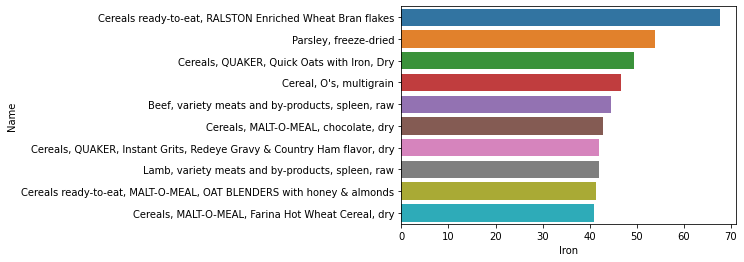

In [64]:
sb.barplot(x=top10["Iron"], y=top10["Name"])

<AxesSubplot:xlabel='Iron', ylabel='Count'>

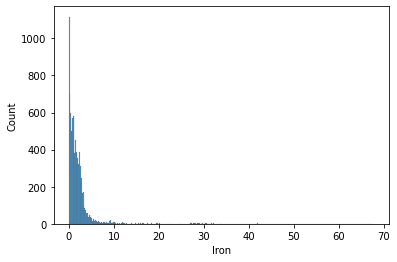

In [81]:
sb.histplot(df['Iron'])

In [94]:
df['Iron'].quantile

<bound method Series.quantile of 3367    67.7
8976    53.9
3451    49.4
3248    46.6
1961    44.6
        ... 
2230     0.0
6464     0.0
2256     0.0
2231     0.0
9311     0.0
Name: Iron, Length: 9559, dtype: float64>